# 1102_DS_Lab5 資料合併與時間序列資料視覺化呈現

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#在Jupyter Notebook上顯示圖表所必需的　magic command
%matplotlib inline

# 整體目標：選取國泰北美科技與台積電的收盤價並繪製趨勢圖

# 工具：concat，merge，空值處理


##  一、爬取資料


##  目標：使用迴圈爬取365天的股市資料，並銜接在一起。
## pd.concat()  
將兩個DataFrame依照自己的條件連接在一起

In [2]:
data_a = pd.DataFrame([[0, 1, 2], [3, 4, 5], [6, 7, 8]],columns = ['key','A','B'])
data_b = pd.DataFrame([[0, 1, 0], [3, 1, 0], [6, 0, 1],[9, 1, 2]],columns = ['key','A','B'])

In [4]:
display(data_a)
display(data_b)

,key,A,B
0,0,1,2
1,3,4,5
2,6,7,8


,key,A,B
0,0,1,0
1,3,1,0
2,6,0,1
3,9,1,2


In [7]:
# concat 使用 join 設定
# join 有兩種模式，分別為 inner, outer
result = pd.concat([data_a,data_b])                # 這兩行程式是全等的，預設 axis=0
result = pd.concat([data_a,data_b], join='outer') # 這兩行程式是全等的
print(result)

   key  A  B
0    0  1  2
1    3  4  5
2    6  7  8
0    0  1  0
1    3  1  0
2    6  0  1
3    9  1  2


In [10]:
result = pd.concat([data_a,data_b], join='inner', ignore_index=True)
print(result)

   key  A  B
0    0  1  2
1    3  4  5
2    6  7  8
3    0  1  0
4    3  1  0
5    6  0  1
6    9  1  2


In [11]:
#垂直併接　　(keys構建分層索引使用通過的鍵作為最外面的級別)
pd.concat([data_a,data_b],keys=['x','y'])

key  A  B
x 0    0  1  2
  1    3  4  5
  2    6  7  8
y 0    0  1  0
  1    3  1  0
  2    6  0  1
  3    9  1  2

In [13]:
#橫向併接
pd.concat([data_a,data_b],keys=['x','y'],axis = 1)

x             y      
   key    A    B key  A  B
0  0.0  1.0  2.0   0  1  0
1  3.0  4.0  5.0   3  1  0
2  6.0  7.0  8.0   6  0  1
3  NaN  NaN  NaN   9  1  2

## 實例：

## Notes : 如果同時爬取過多資料，伺服器會誤以為是網路攻擊而將該IP封鎖至少一天，所以建議使用 time套件裡的 time.sleep()來延遲抓取 ，請同學實作時避免同時間大量下載資料。

In [14]:
import requests
import time
import datetime

In [81]:
data = pd.DataFrame()

In [82]:
first_date = datetime.date(2021,1,1)
print(first_date)
date = str(first_date).replace('-','') 
print (date)

2021-01-01
20210101


In [ ]:
#設置初始日期
first_date = datetime.date(2021,1,5)
for i in range(0,10,1):
    
    # 可以使用下一行程式來看程式是否有在執行
    print(first_date,end='\t')
    
    #加datetime格式轉成string
    date = str(first_date).replace('-','')
    
    #爬取程式 詳情請參考LAB2
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    response = requests.get(url)
    response_json = response.json()
    if response_json['stat']=='OK':
        stock = pd.DataFrame(response_json['data9'], 
                     columns=response_json['fields9'])
        stock['date'] = first_date
        data = pd.concat([data,stock])
        
    # 利用 datetime格式使日期加1天  datetime格式會自動進位月分與年份 
    first_date = first_date + datetime.timedelta(days=1)
    
    # *****非常重要*****
    # *****非常重要*****
    # *****非常重要*****
    # 將程式延遲5秒在執行下一次迴圈
    time.sleep(5)

2021-01-05	2021-01-06	2021-01-07	2021-01-08	2021-01-09	2021-01-10	2021-01-11	

In [70]:
print(data)

            closing_price_ETF  closing_price_TSMC        date   成交筆數  \
2021-01-05              31.91               542.0         NaN    NaN   
2021-01-06              31.80               549.0         NaN    NaN   
2021-01-07              31.89               565.0         NaN    NaN   
2021-01-08              32.56               580.0         NaN    NaN   
2021-01-11              32.58               584.0         NaN    NaN   
2021-01-12              32.30               591.0         NaN    NaN   
2021-01-13              32.24               605.0         NaN    NaN   
2021-01-14              32.35               592.0         NaN    NaN   
2021-01-15              31.93               601.0         NaN    NaN   
2021-01-18              31.76               607.0         NaN    NaN   
2021-01-19              31.91               627.0         NaN    NaN   
2021-01-20              32.07               647.0         NaN    NaN   
2021-01-21              33.00               673.0         NaN   

In [75]:
#請爬取完後進行輸出保存，以免未來需要從重新使用原始資料
# data.to_csv('../data_science_data.csv')
data.to_csv('data_science_data.csv')

In [76]:
pwd

'C:\\Users\\TWP\\Desktop\\1102_DS_Lab5'

In [79]:
#請用絕對位置，相對路徑會導向安裝anaconda的地方
data = pd.read_csv('C:\\Users\\TWP\\Desktop\\1102_DS_Lab5\\data_science_data.csv',index_col=0)

In [80]:
data

,closing_price_ETF,closing_price_TSMC,date,成交筆數,成交股數,成交金額,收盤價,最低價,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,最高價,本益比,漲跌(+/-),漲跌價差,證券代號,證券名稱,開盤價
2021-01-05,31.91,542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,31.80,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,31.89,565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,32.56,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,32.58,584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12,32.30,591.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-13,32.24,605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-14,32.35,592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-15,31.93,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18,31.76,607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 二、資料清理

## 目標：整理出一個DataFrame 包含日期、國泰北美科技收盤價、台積電收盤價

In [23]:
#只取出想要的columns
data = data[['date','證券名稱','收盤價']]

In [24]:
data

,date,證券名稱,收盤價
0,2021-01-05,元大台灣50,124.60
1,2021-01-05,元大中型100,44.64
2,2021-01-05,富邦科技,112.90
3,2021-01-05,元大電子,59.25
4,2021-01-05,元大台商50,28.90
5,2021-01-05,元大MSCI金融,18.07
6,2021-01-05,元大高股息,30.02
7,2021-01-05,富邦摩台,82.20
8,2021-01-05,元大寶滬深,24.46
9,2021-01-05,元大MSCI台灣,58.05


In [25]:
#把收盤價改為英文標題，未來處理其他程序時才不會有警告圖示
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'closing_price'})

In [26]:
data.describe()

,date,name,closing_price
count,15705,15705,15705
unique,14,1127,3393
top,2021-01-21,虹冠電,--
freq,1124,14,129


### 轉換收盤價的資料型態(object -> float)，詳情請參考lab3。轉換目的：未來在繪圖時float型態才可運行

In [27]:
data['closing_price'] = data['closing_price'].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data['closing_price'] = data['closing_price'].astype('float64')

In [28]:
data.describe()

,closing_price
count,15576.000000
mean,62.685501
std,159.002641
min,1.280000
25%,16.877500
50%,30.100000
75%,58.400000
max,3315.000000


## merge()
將兩個DataFrame依照設定的key組合在一起.

In [29]:
data_a = pd.DataFrame([[0, 1, 2], [3, 4, 5], [6, 7, 8]],columns = ['key','A','B'])
data_b = pd.DataFrame([[0, 1, 0], [3, 1, 0], [6, 0, 1],[9, 1, 2]],columns = ['key','A','B'])

In [30]:
display(data_a)
display(data_b)

,key,A,B
0,0,1,2
1,3,4,5
2,6,7,8


,key,A,B
0,0,1,0
1,3,1,0
2,6,0,1
3,9,1,2


### on參數：依照設定參數當作key進行合併

### how參數：有left(依照輸入左側的df進行合併)、right(右側)、inner(取交集)、outer(取聯集)

In [31]:
pd.merge(data_a,data_b,on='key',how='left')

,key,A_x,B_x,A_y,B_y
0,0,1,2,1,0
1,3,4,5,1,0
2,6,7,8,0,1


#### suffixes參數：更改後綴名稱

In [32]:
pd.merge(data_a,data_b,on='key',how='left', suffixes=('_a', '_b'))

,key,A_a,B_a,A_b,B_b
0,0,1,2,1,0
1,3,4,5,1,0
2,6,7,8,0,1


## 實例：

## 把國泰北美科技的資料與台積電的資料進行合併

In [33]:
data_ETF = data[data['name']=='國泰北美科技']

In [34]:
data_TSMC = data[data['name']=='台積電']

In [35]:
display(data_ETF)
display(data_TSMC)

,date,name,closing_price
106,2021-01-05,國泰北美科技,31.91
106,2021-01-06,國泰北美科技,31.80
106,2021-01-07,國泰北美科技,31.89
106,2021-01-08,國泰北美科技,32.56
106,2021-01-11,國泰北美科技,32.58
106,2021-01-12,國泰北美科技,32.30
106,2021-01-13,國泰北美科技,32.24
106,2021-01-14,國泰北美科技,32.35
106,2021-01-15,國泰北美科技,31.93
106,2021-01-18,國泰北美科技,31.76


,date,name,closing_price
424,2021-01-05,台積電,542.0
424,2021-01-06,台積電,549.0
424,2021-01-07,台積電,565.0
423,2021-01-08,台積電,580.0
423,2021-01-11,台積電,584.0
423,2021-01-12,台積電,591.0
423,2021-01-13,台積電,605.0
423,2021-01-14,台積電,592.0
423,2021-01-15,台積電,601.0
423,2021-01-18,台積電,607.0


In [36]:
# 以後不須使用的證券名稱，所以先行丟掉
data_ETF = data_ETF.drop('name',axis = 1)
data_TSMC = data_TSMC.drop('name',axis = 1)

In [37]:
display(data_ETF)
display(data_TSMC)

,date,closing_price
106,2021-01-05,31.91
106,2021-01-06,31.80
106,2021-01-07,31.89
106,2021-01-08,32.56
106,2021-01-11,32.58
106,2021-01-12,32.30
106,2021-01-13,32.24
106,2021-01-14,32.35
106,2021-01-15,31.93
106,2021-01-18,31.76


,date,closing_price
424,2021-01-05,542.0
424,2021-01-06,549.0
424,2021-01-07,565.0
423,2021-01-08,580.0
423,2021-01-11,584.0
423,2021-01-12,591.0
423,2021-01-13,605.0
423,2021-01-14,592.0
423,2021-01-15,601.0
423,2021-01-18,607.0


In [38]:
data = pd.merge(data_ETF,data_TSMC,on='date',how = 'left',suffixes=('_ETF','_TSMC'))

In [39]:
data

,date,closing_price_ETF,closing_price_TSMC
0,2021-01-05,31.91,542.0
1,2021-01-06,31.80,549.0
2,2021-01-07,31.89,565.0
3,2021-01-08,32.56,580.0
4,2021-01-11,32.58,584.0
5,2021-01-12,32.30,591.0
6,2021-01-13,32.24,605.0
7,2021-01-14,32.35,592.0
8,2021-01-15,31.93,601.0
9,2021-01-18,31.76,607.0


# 空值處理

## 範例

In [40]:
data_a = pd.DataFrame([[0, 1, 2], [3, 4, 5], [11, 7, 8]],columns = ['key','A','B'])
data_b = pd.DataFrame([[0, 1, 0], [2, 1, 0], [6, 0, 1],[9, 1, 2]],columns = ['key','A','B'])

In [41]:
data_test = pd.merge(data_a,data_b,on='key',how = 'outer')
data_test

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,NaN,NaN
2,11,7.0,8.0,NaN,NaN
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


## dropna 將有空值的row刪除

In [42]:
data_test.dropna()

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0


In [43]:
data_test.dropna(axis='columns')

,key
0,0
1,3
2,11
3,2
4,6
5,9


In [44]:
data_test.dropna(axis='columns', how='all')

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,NaN,NaN
2,11,7.0,8.0,NaN,NaN
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


In [49]:
data_test.dropna(axis='rows', thresh=4)

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0


## fillna 將有空值的地方填上想要的值

In [80]:
data_test.fillna(0)

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,0.0,0.0
2,11,7.0,8.0,0.0,0.0
3,2,0.0,0.0,1.0,0.0
4,6,0.0,0.0,0.0,1.0
5,9,0.0,0.0,1.0,2.0


In [57]:
data_test.fillna(method='ffill')

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,1.0,0.0
2,11,7.0,8.0,1.0,0.0
3,2,7.0,8.0,1.0,0.0
4,6,7.0,8.0,0.0,1.0
5,9,7.0,8.0,1.0,2.0


In [81]:
data_test.fillna(method='bfill')

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,1.0,0.0
2,11,7.0,8.0,1.0,0.0
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


## pd.isnull()  pd.notnull() 產生是否為空值的布林Series

In [52]:
pd.isnull(data_test['A_x'])

0    False
1    False
2    False
3     True
4     True
5     True
Name: A_x, dtype: bool

In [53]:
data_test[pd.isnull(data_test['A_x'])]

,key,A_x,B_x,A_y,B_y
3,2,NaN,NaN,1.0,0.0
4,6,NaN,NaN,0.0,1.0
5,9,NaN,NaN,1.0,2.0


In [54]:
pd.notnull(data_test['A_x'])

0     True
1     True
2     True
3    False
4    False
5    False
Name: A_x, dtype: bool

In [55]:
data_test[pd.notnull(data_test['A_x'])]

,key,A_x,B_x,A_y,B_y
0,0,1.0,2.0,1.0,0.0
1,3,4.0,5.0,NaN,NaN
2,11,7.0,8.0,NaN,NaN


#### 實例：

## 有些股票可能沒有交易資訊，必須清除乾淨

In [56]:
data[pd.isnull(data['closing_price_ETF'])]

,date,closing_price_ETF,closing_price_TSMC


In [57]:
data = data.dropna()

# 三、簡易顯示圖表

## pd.plot()  附註：plot未來會詳細解釋

In [58]:
#df內的資料型態必須一樣，所以使日期當作是index也就是橫坐標
data = data.set_index('date')

In [59]:
data

,closing_price_ETF,closing_price_TSMC
date,,
2021-01-05,31.91,542.0
2021-01-06,31.80,549.0
2021-01-07,31.89,565.0
2021-01-08,32.56,580.0
2021-01-11,32.58,584.0
2021-01-12,32.30,591.0
2021-01-13,32.24,605.0
2021-01-14,32.35,592.0
2021-01-15,31.93,601.0


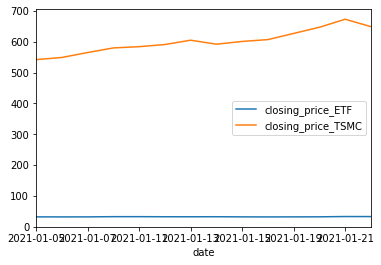

In [60]:
#如果按一次沒顯示，那就再按一次。
data.plot()

In [ ]:
## 作業三 (Due 4/12) 題目一: 請繪製台積電在2021年的收盤價及開盤價的趨勢圖。